In [1]:
# Task 1 - Movie Genre Classification
# CodSoft Internship Project

# Step 1: Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [2]:
# Step 2: Load training data from train_data.txt
train_data = []

with open("train_data.txt", "r", encoding="utf-8") as file:
    for line in file:
        parts = line.strip().split(" ::: ")
        if len(parts) == 4:
            _, _, genre, summary = parts
            train_data.append((genre.lower(), summary))

df = pd.DataFrame(train_data, columns=["genre", "summary"])
df.head()


,genre,summary
0,drama,Listening in to a conversation between his doc...
1,thriller,A brother and sister with a past incestuous re...
2,adult,As the bus empties the students for their fiel...
3,drama,To help their unemployed father make ends meet...
4,drama,The film's title refers not only to the un-rec...


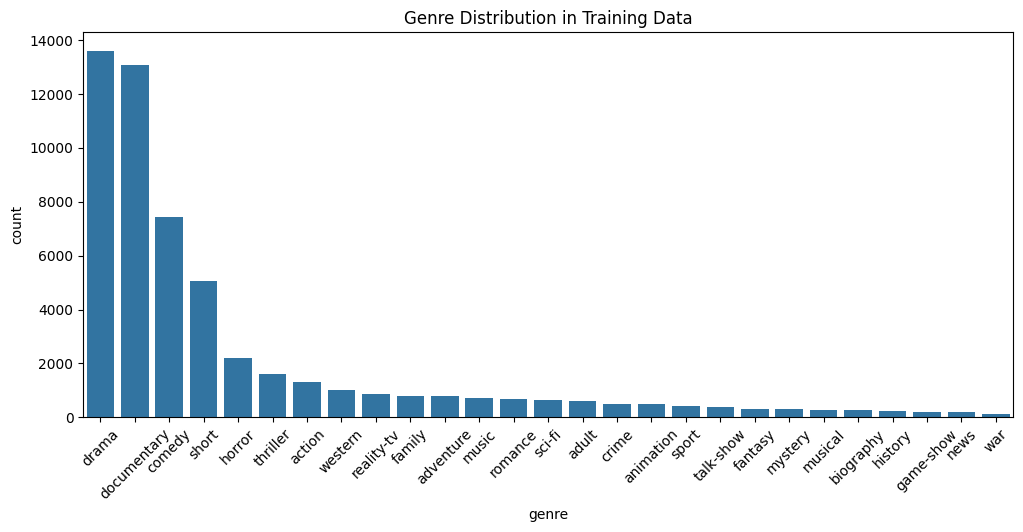

In [4]:
# Step 3: Visualize genre distribution
plt.figure(figsize=(12, 5))
sns.countplot(data=df, x="genre", order=df["genre"].value_counts().index)
plt.xticks(rotation=45)
plt.title("Genre Distribution in Training Data")
plt.show()


In [5]:
# Step 4: Preprocessing and vectorization
X = df["summary"]
y = df["genre"]

vectorizer = TfidfVectorizer(stop_words="english", max_features=5000)
X_vectorized = vectorizer.fit_transform(X)

X_train, X_val, y_train, y_val = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)


In [6]:
# Step 5: Train Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

# Validate
y_pred_val = model.predict(X_val)


In [7]:
# Step 6: Evaluate on validation split
print("Validation Accuracy:", accuracy_score(y_val, y_pred_val))
print("\nClassification Report:\n", classification_report(y_val, y_pred_val))


Validation Accuracy: 0.5225491100249009

Classification Report:
               precision    recall  f1-score   support

      action       0.58      0.08      0.15       263
       adult       0.88      0.06      0.12       112
   adventure       0.29      0.03      0.05       139
   animation       0.00      0.00      0.00       104
   biography       0.00      0.00      0.00        61
      comedy       0.51      0.44      0.47      1443
       crime       0.00      0.00      0.00       107
 documentary       0.57      0.88      0.70      2659
       drama       0.46      0.83      0.59      2697
      family       1.00      0.01      0.01       150
     fantasy       0.00      0.00      0.00        74
   game-show       1.00      0.15      0.26        40
     history       0.00      0.00      0.00        45
      horror       0.73      0.38      0.50       431
       music       0.79      0.10      0.18       144
     musical       0.00      0.00      0.00        50
     mystery    

C:\Users\Bhoomikha\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Bhoomikha\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Bhoomikha\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.cap

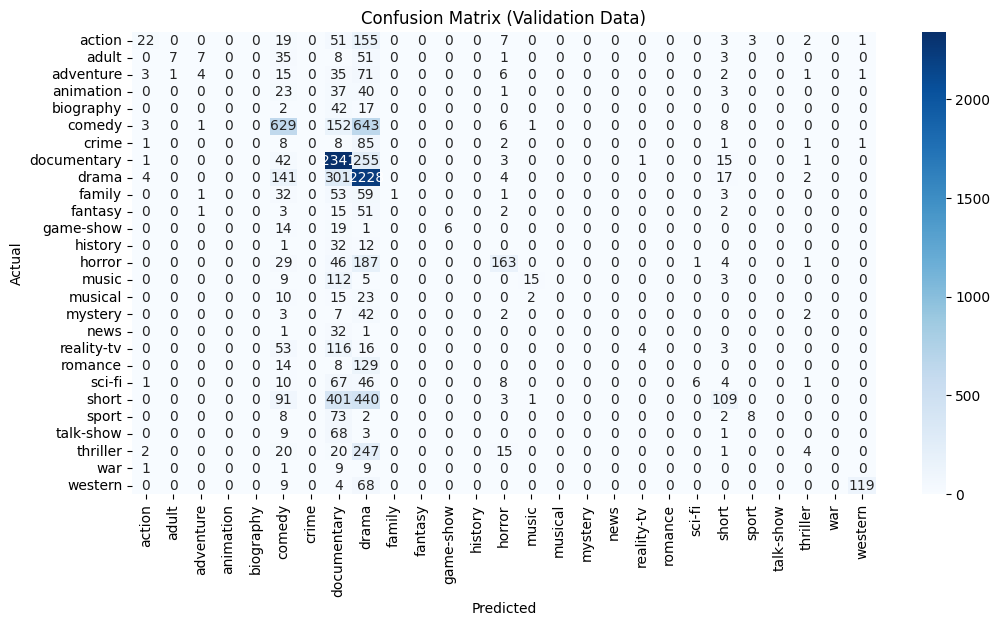

In [8]:
# Step 7: Confusion Matrix
plt.figure(figsize=(12, 6))
sns.heatmap(confusion_matrix(y_val, y_pred_val),
            annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix (Validation Data)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [9]:
# Step 8: Load test data from test_data.txt (no genres)
test_summaries = []

with open("test_data.txt", "r", encoding="utf-8") as file:
    for line in file:
        parts = line.strip().split(" ::: ")
        if len(parts) == 3:
            _, _, summary = parts
            test_summaries.append(summary)

X_test_vectorized = vectorizer.transform(test_summaries)
y_test_predicted = model.predict(X_test_vectorized)


In [10]:
# Step 9: Load actual genres from test_data_solution.txt
actual_data = []

with open("test_data_solution.txt", "r", encoding="utf-8") as file:
    for line in file:
        parts = line.strip().split(" ::: ")
        if len(parts) == 4:
            _, _, genre, summary = parts
            actual_data.append((genre.lower(), summary))

test_df = pd.DataFrame(actual_data, columns=["actual_genre", "summary"])
test_df["predicted_genre"] = y_test_predicted[:len(test_df)]  # trim if needed

test_df.head()


,actual_genre,summary,predicted_genre
0,thriller,"L.R. Brane loves his life - his car, his apart...",drama
1,comedy,"Spain, March 1964: Quico is a very naughty chi...",drama
2,documentary,One year in the life of Albin and his family o...,documentary
3,drama,"His father has died, he hasn't spoken with his...",drama
4,drama,Before he was known internationally as a marti...,drama


In [11]:
# Step 10: Evaluate on test_data
print("Test Set Accuracy:", accuracy_score(test_df["actual_genre"], test_df["predicted_genre"]))
print("\nTest Classification Report:\n", classification_report(test_df["actual_genre"], test_df["predicted_genre"]))


Test Set Accuracy: 0.5193911439114391


C:\Users\Bhoomikha\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Bhoomikha\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Test Classification Report:
               precision    recall  f1-score   support

      action       0.57      0.08      0.15      1314
       adult       0.59      0.04      0.08       590
   adventure       0.74      0.08      0.14       775
   animation       0.00      0.00      0.00       498
   biography       0.00      0.00      0.00       264
      comedy       0.51      0.42      0.46      7446
       crime       0.00      0.00      0.00       505
 documentary       0.57      0.88      0.69     13096
       drama       0.46      0.83      0.59     13612
      family       0.00      0.00      0.00       783
     fantasy       0.00      0.00      0.00       322
   game-show       0.98      0.29      0.45       193
     history       0.00      0.00      0.00       243
      horror       0.70      0.33      0.45      2204
       music       0.81      0.11      0.19       731
     musical       0.00      0.00      0.00       276
     mystery       0.00      0.00      0.00       3

C:\Users\Bhoomikha\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


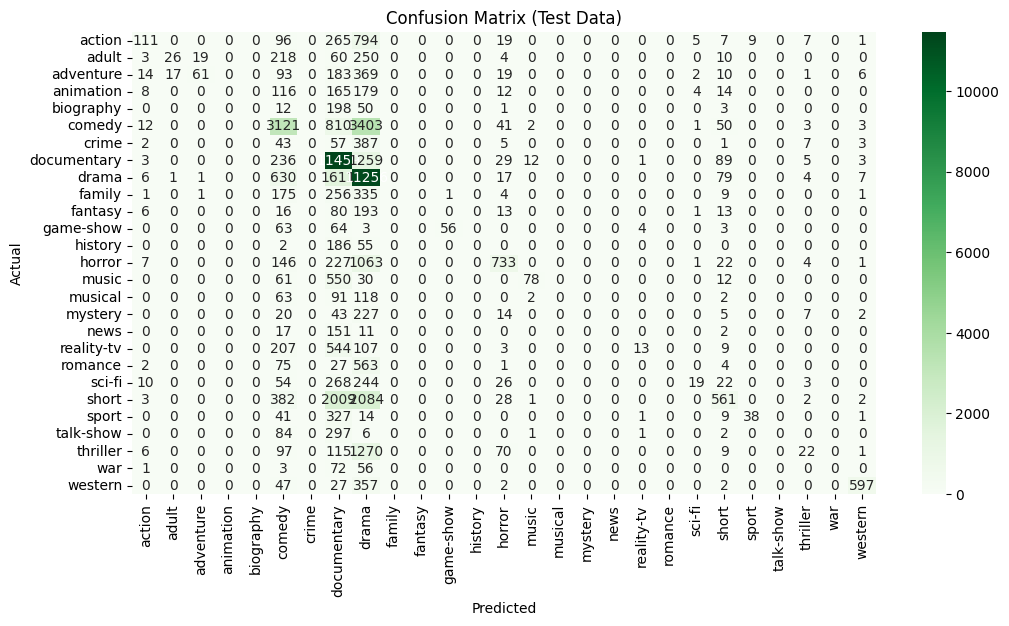

In [12]:
# Step 11: Confusion matrix for test set
plt.figure(figsize=(12, 6))
sns.heatmap(confusion_matrix(test_df["actual_genre"], test_df["predicted_genre"]),
            annot=True, fmt='d', cmap='Greens',
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix (Test Data)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [13]:
# Step 12: Predict genre for a custom movie summary
sample = ["A brave hero rises to save the world from destruction, uncovering secrets from his past."]
sample_vector = vectorizer.transform(sample)
predicted_genre = model.predict(sample_vector)[0]
print("Predicted Genre:", predicted_genre)


Predicted Genre: drama


In [17]:
test_ids = []
test_summaries = []

with open("test_data.txt", "r", encoding="utf-8") as file:
    for line in file:
        parts = line.strip().split(" ::: ")
        if len(parts) == 3:
            test_ids.append(parts[0])        # ID
            test_summaries.append(parts[2])   # Summary only


In [18]:
test_vectors = vectorizer.transform(test_summaries)
predicted_genres = model.predict(test_vectors)


In [21]:
# ✅ Save predicted genres with IDs to predicted_genres.txt in ::: format

# Step 1: Create DataFrame from test IDs and predicted genres
pred_df = pd.DataFrame({
    "ID": test_ids,
    "predicted_genre": predicted_genres
})

# Step 2: Write to file with custom separator
with open("predicted_genres.txt", "w", encoding="utf-8") as f:
    for idx, row in pred_df.iterrows():
        f.write(f"{row['ID']} ::: {row['predicted_genre']}\n")

print("✅ Predicted genres saved to 'predicted_genres.txt'")


✅ Predicted genres saved to 'predicted_genres.txt'
